In [386]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.utils import shuffle


In [429]:
class LinearRegression:
    def __init__(self,x,y,iteration,alpha, algo='batch',mini_batch_size=1,gamma=0.9):
        self.m=len(x)
        self.x,self.y=self.__process(x,y)
        self.iteration=iteration
        self.alpha=alpha
        self.algo=algo
        self.batchSize=mini_batch_size
        self.gamma=gamma
        self.x=np.insert(self.x,0,np.ones(self.m),1)
        self.theta=np.zeros(self.x.shape[1])
        self.v=np.zeros(self.x.shape[1])
        self.cost=0
        self.costHistory=[]
        self.thetaHistory=[]
        
    def __process(self,x,y):
        y=np.array(y).reshape((y.shape[0],))
        x=np.array(x)
        if len(x.shape)<2:
            x= x.reshape((x.shape[0],1))
        
        return shuffle(x, y)
    
    def  __hypo(self,x,theta):
        return x@theta.T
    
    def __cost(self,h,y):
        return sum((h-y)**2)/self.m
    
    def  __gradient(self,x,y,h):
        return (1/len(x))*(x.T@(h-y))
    
    def __updateLog(self):
        self.costHistory.append(self.cost)
        self.thetaHistory.append(self.theta)
    
    def __batchGD(self):
        for epoch in range(self.iteration):
            h=self.__hypo(self.x,self.theta)
            grad=self.__gradient(self.x,self.y,h)
            self.theta=self.theta-self.alpha*grad
            self.cost=self.__cost(h,y)
            self.__updateLog()
#             if epoch>1 and self.costHistory[epoch-1]-self.costHistory[epoch]<=0.001:
#                 break
                
        
        
        
    
    def __miniBatchGD(self):
        size=self.m//self.batchSize
        remainder=self.m%self.batchSize
        for epoch in range(self.iteration):
            for i in range(self.batchSize):
                start=i*size
                end=(i+1)*size if i<self.batchSize-1 else ((i+1)*size)+remainder
                h=self.__hypo(self.x[start:end,:],self.theta)
                grad=self.__gradient(self.x[start:end,:],self.y[start:end],h)
                self.theta=self.theta-self.alpha*grad
                self.cost=self.__cost(h,self.y[start:end])
            self.__updateLog()
    
    
    
    
    def __stochasticGD(self):
        for epoch in range(self.iteration):
            H,Y=[],[]
            for i in range(self.m):
                h=self.__hypo(self.x[i,:],self.theta)
                grad=self.__gradient(self.x[i:i+1,:],self.y[i:i+1],h)
                self.theta=self.theta-self.alpha*grad
                H.append(h)
                Y.append(y[i])
            self.cost=self.__cost(np.array(H),np.array(Y))
            self.__updateLog()
#             if epoch>1 and self.costHistory[epoch-1]-self.costHistory[epoch]<=0.001:
#                 break
    
    
    def __momentumGD(self):
         for epoch in range(self.iteration):
            h=self.__hypo(self.x,self.theta)
            grad=self.__gradient(self.x,self.y,h)
            self.v=self.gamma*self.v+self.alpha*grad
            self.theta=self.theta-self.v
            self.cost=self.__cost(h,y)
            self.__updateLog()
            
            
    def __nagGD(self):
        for epoch in range(self.iteration):
            temp=self.theta-self.gamma*self.v
            h=self.__hypo(self.x,temp)
            grad=self.__gradient(self.x,self.y,h)
            self.theta=temp-self.alpha*grad
            self.v=self.gamma*self.v+self.alpha*grad
            self.cost=self.__cost(h,y)
            self.__updateLog()
              
            
    def train(self):
        self.costHistory,self.thetaHistory,self.cost=[],[],0
        
        if algo=='stochastic':
            self.__stochasticGD()
    
        elif algo=='batch':
            self.__batchGD()
        
        elif algo=='miniBatch':
            self.__miniBatchGD()
            
        elif algo=='momentum':
            self.__momentumGD()
            
        elif algo=='nag':
            self.__nagGD()
            
    def history(self):
        return np.array(self.costHistory),np.array(self.thetaHistory)
    
    def predict(self,x):
        x=np.array(x)
        if len(x.shape)<2:
            x= x.reshape((x.shape[0],1))
        x=np.insert(x,0,np.ones(self.m),1)
        return self.__hypo(x,self.theta)
    

In [387]:
# DATA 1
x=np.array([[1400],[1600],[1700],[1875],[1100],[1550],[2350],[2450],[1425],[1700]])
y=np.array([[245000],[312000],[279000],[308000],[199000],[219000],[405000],[324000],[319000],[255000]])


In [469]:
# DATA 2
# data=pd.read_csv("student_scores.csv")
# x=data.iloc[:,:-1]
# y=data.iloc[:,-1]
data=np.genfromtxt("student_scores.csv", delimiter=',',skip_header=1)
x=data[:,:-1]
y=data[:,-1]


In [451]:
# DATA 3
data=np.genfromtxt("california_housing_train.csv", delimiter=',', skip_header=1)
x=data[:,:-1]
y=data[:,-1]

In [467]:
# normalization for each column 
for i in range(x.shape[1]):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

In [470]:
alpha=0.01
iteration=100
algo='batch'
lr_model=LinearRegression(x,y,iteration,alpha,algo)
lr_model.train()
y_hat=lr_model.predict(x)
r2_score(y, y_hat)

0.9527784938617239

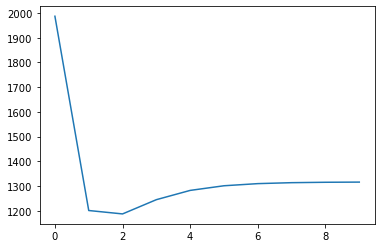

In [484]:
cost,_=lr_model.history()
plt.plot(cost)

In [482]:
alpha=0.001
iteration=10
algo='stochastic'
lr_model=LinearRegression(x,y,iteration,alpha,algo)
lr_model.train()
y_hat=lr_model.predict(x)
r2_score(y, y_hat)

0.9526214386260681

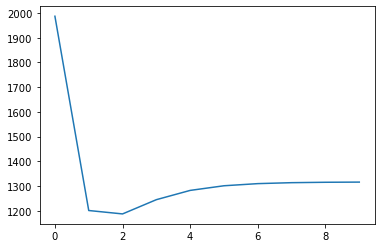

In [483]:
cost,_=lr_model.history()
plt.plot(cost)

In [474]:
alpha=0.01
iteration=15
algo='miniBatch'
batchSize=2
lr_model=LinearRegression(x,y,iteration,alpha,algo,batchSize)
lr_model.train()
y_hat=lr_model.predict(x)
r2_score(y, y_hat)

0.9527454310821685

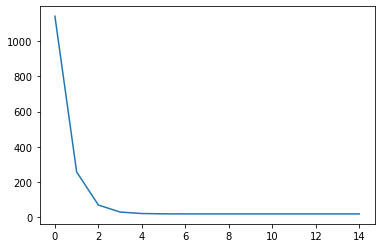

In [475]:
cost,_=lr_model.history()
plt.plot(cost)

In [476]:
alpha=0.01
iteration=100
algo='momentum'
gamma=0.9
lr_model=LinearRegression(x,y,iteration,alpha,algo,gamma=gamma)
lr_model.train()
y_hat=lr_model.predict(x)
r2_score(y, y_hat) 

0.9528678218600242

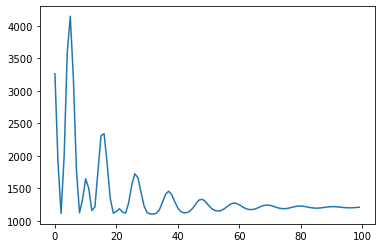

In [477]:
cost,_=lr_model.history()
plt.plot(cost)

In [478]:
alpha=0.01
iteration=10
algo='nag'
gamma=0.9
lr_model=LinearRegression(x,y,iteration,alpha,algo,gamma=gamma)
lr_model.train()
y_hat=lr_model.predict(x)
r2_score(y, y_hat) 

0.9188198344967863

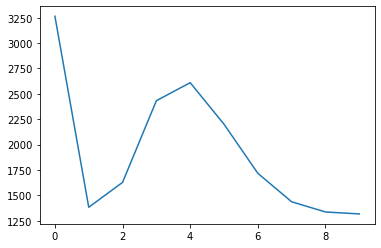

In [479]:
cost,_=lr_model.history()
plt.plot(cost)